# Empalme con la clase anterior.


# Metodo de separacion de variables


**Ejemplo 4.2.1**: Considere el problema

$$
\begin{cases}
u_{tt} - c^2 u_{xx} = 0  \\
u(0,t) = u(\ell, t) = 0 \quad , \quad \text{condiciones de borde} \\
u(x,0) = \varphi(x) \quad, \quad u_t(x,0) = \psi(x) = 0 \quad, \quad \text{condiciones iniciales}
\end{cases}
$$

En la clase anterior encontramos que la solucion de este problema es:





$$u(x,t) = \sum_{i=1}^{\infty} a_i \frac{\sin  i \pi x}{\ell} \cos \frac{i \pi c t}{\ell} $$
con
$$a_i = \frac{2}{\ell} \left \langle \varphi(x), \sin \frac{i \pi x}{\ell} \right \rangle  = \frac{2}{\ell} \int_0^{\ell}  \varphi(x) \sin \frac{n \pi x }{\ell} dx
\ $$
(en la clase anterior olvide el factor $2/\ell$.)

Vamos a implementar esta solucion usando `Python`.

Para esto definimos la condicion inicial

$$u(x,0) = \varphi(x)  =
\begin{cases}
0 \quad , \quad x < 0 \\
x \quad , \quad 0 \le x \le 0.5 \\
1 -x \quad , \quad 0.5 \le x \le 1
\end{cases} $$

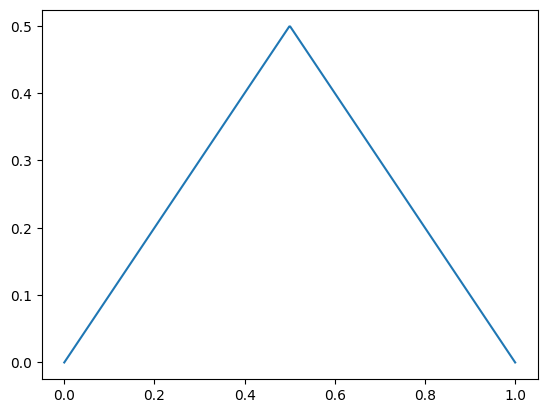

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define parameters
ell=1.0
c=1.0
nx=500
nt=200
x = np.linspace(0,ell,nx)
t = np.linspace(0,2,nt)

# initial condition
def phi(x):
    return np.piecewise(x, [x < 0, (x >= 0) & (x <= 0.5), x > 0.5], [0, lambda x: x, lambda x: 1-x])

y=phi(x)

# grafiquemos
plt.plot(x,y)
plt.show()

<ipython-input-2-4b5c85f04a41>:3: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return 2/ell * np.trapz( y* np.sin(n*np.pi*x/ell), x)


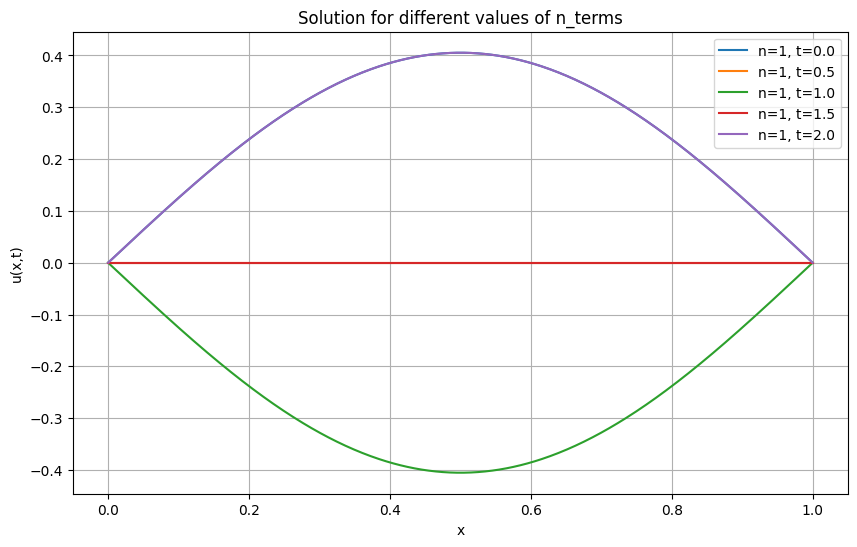

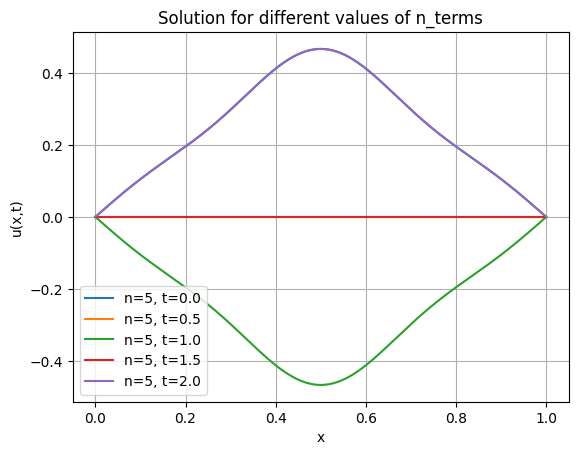

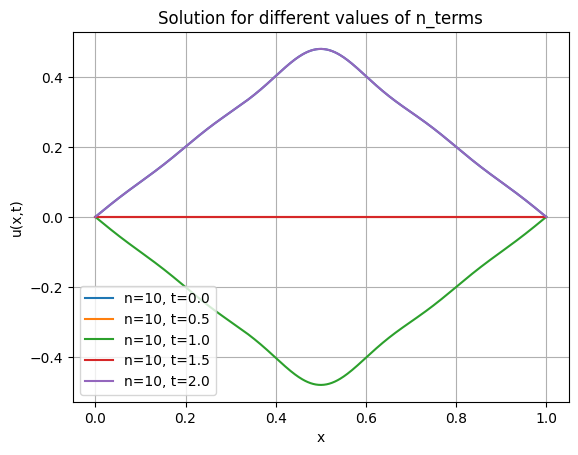

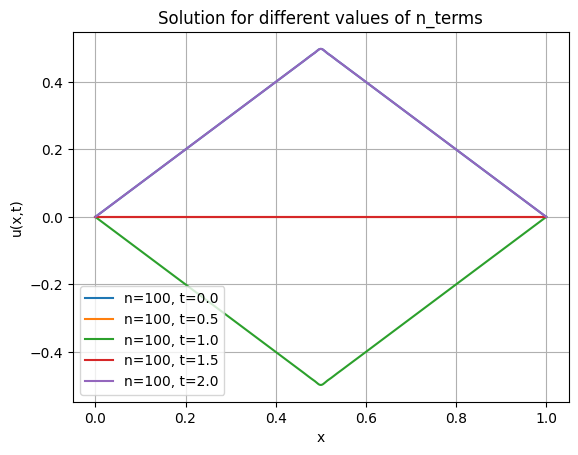

In [2]:
# compute coefficientes a_n
def a_n(n):
    return 2/ell * np.trapz( y* np.sin(n*np.pi*x/ell), x)

# calculamos u(x,t, nterms)
def u(x,t, n_terms):
    u_xt = np.zeros_like(x)
    for n in range(0,n_terms+1):
        u_xt += a_n(n)*np.sin(n*np.pi*x/ell)*np.cos(n*np.pi*c*t/ell)
    return u_xt

# plot solution for different values of n_terms
n_value=[1, 5, 10, 100]

plt.figure(figsize=(10,6))
for n_terms in n_value:
    for t_i in np.linspace(0, 2, 5):
        plt.plot(x , u(x, t_i, n_terms), label=f'n={n_terms}, t={t_i}')
    plt.title('Solution for different values of n_terms')
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.legend()
    plt.grid()
    plt.show()

In [3]:
# genermos algunos a_n de 1 a 10
for n in range(1,11):
    print(f"a_{n} = {a_n(n)}")


a_1 = 0.40528406522567495
a_2 = 5.551115123125783e-17
a_3 = -0.04503096781212449
a_4 = 2.7755575615628914e-17
a_5 = 0.0162107199833812
a_6 = 2.0816681711721685e-17
a_7 = -0.008270447576913403
a_8 = -6.938893903907228e-18
a_9 = 0.005002845712180379
a_10 = 1.3877787807814457e-17


<ipython-input-2-4b5c85f04a41>:3: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return 2/ell * np.trapz( y* np.sin(n*np.pi*x/ell), x)


<ipython-input-2-4b5c85f04a41>:3: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return 2/ell * np.trapz( y* np.sin(n*np.pi*x/ell), x)


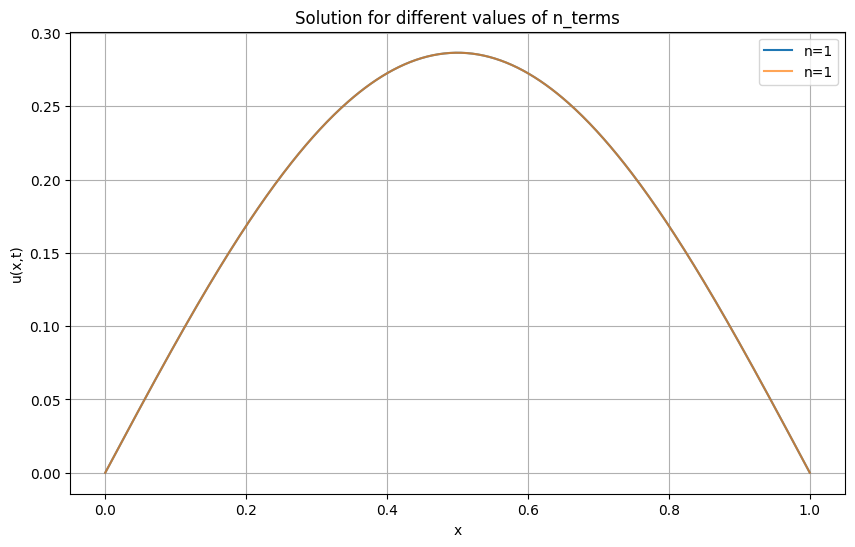

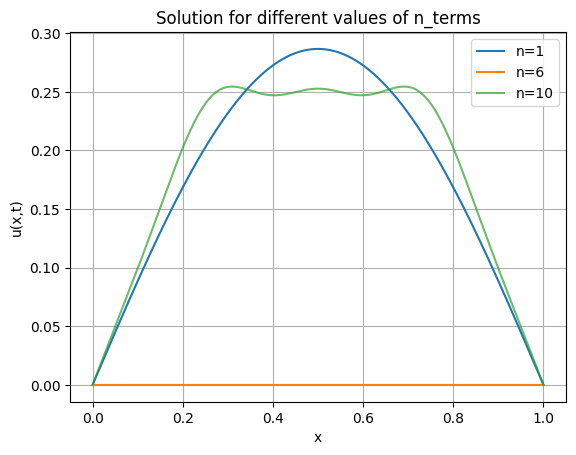

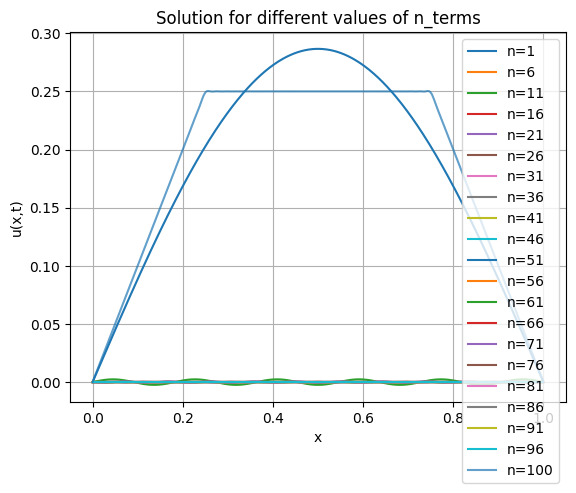

In [4]:
# otras graficas, para un tiempo t=0.25 y las sumas parciales
nx=500
x = np.linspace(0, ell,nx)

# calculamos el termino n de la serie para u(x,t)
def u_n(x, t, n):
    return a_n(n)*np.sin(n*np.pi*x/ell)*np.cos(n*np.pi*c*t/ell)

# calcule la solucion u(x,t) con n terms
def u(x, t, n_terms):
    u_xt = np.zeros_like(x)
    for n in range(0,n_terms+1):
        u_xt += u_n(x, t, n)
    return u_xt

# plot the individual components and the sum for different values of n_terms
n_value=[1, 10, 100]
jump=5
t=0.25

plt.figure(figsize=(10,6))
for n_terms in n_value:

    # plot individual componets
    for n in range(1,n_terms+1,jump):
        plt.plot(x, u_n(x, t, n), label=f'n={n}')

    # plot the total sum
    plt.plot(x, u(x, t, n_terms), label=f'n={n_terms}', alpha=0.7)


    plt.title('Solution for different values of n_terms')
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.legend()
    plt.grid()
    plt.show()



<ipython-input-2-4b5c85f04a41>:3: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return 2/ell * np.trapz( y* np.sin(n*np.pi*x/ell), x)


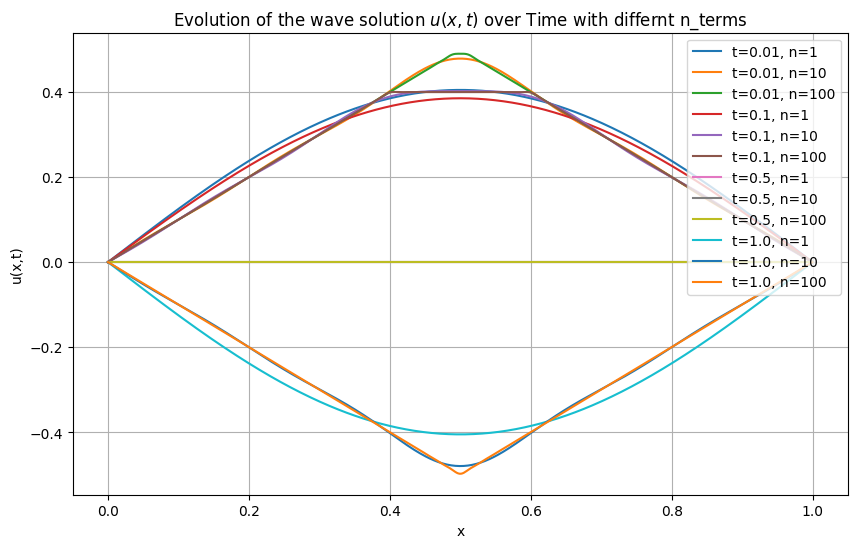

In [9]:
# different times and number of terms accumulated in one plot
nx=500
x = np.linspace(0, ell, nx)

# calculate nth term in the series for u(x,t)
def u_n(x, t, n):
    a = a_n(n)
    return a* np.sin(n*np.pi*x/ell)*np.cos(n*np.pi*c*t/ell)

# calculate the solution u(x,t) with n_term terms
def u(x, t, n_terms):
    u_xt = np.zeros_like(x)
    for n in range(1,n_terms+1):
        u_xt += u_n(x, t, n)
    return u_xt

# define time points and number of terms
time_point = [0.01, 0.1, 0.5, 1.0]
n_value=[1, 10, 100]

# plot figure
plt.figure(figsize=(10,6))


# plotting solutio for different times and n_terms
for i, t in enumerate(time_point):
    for n_terms in n_value:
        plt.plot(x, u(x, t, n_terms), label=f't={t}, n={n_terms}')

plt.title("Evolution of the wave solution $u(x,t)$ over Time with differnt n_terms")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend(loc='upper right')
plt.grid()
plt.show()


<ipython-input-10-d7d11e01f45f>:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return 2/ell * np.trapz( phi(x)* np.sin(n*np.pi*x/ell), x)


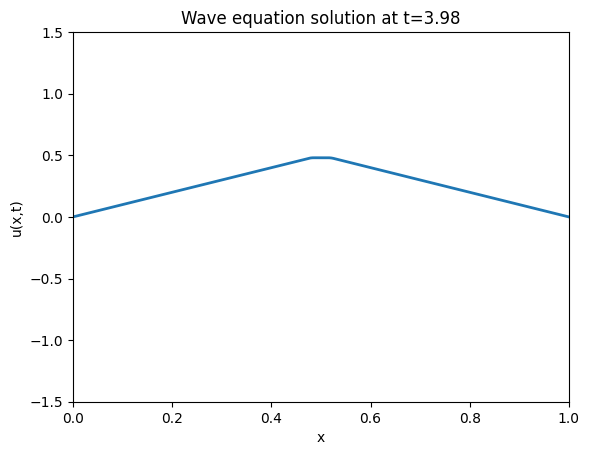

In [10]:
# Animacion
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import numpy as np

# define parameters
ell=1.0
c=1.0
nx=500
nt=200
x = np.linspace(0,ell,nx)
t = np.linspace(0,2,nt)

# define initial condition phi(x)
def phi(x):
    return np.piecewise(x, [x < 0, (x >= 0) & (x <= 0.5), x > 0.5], [0, lambda x: x, lambda x: 1-x])

# calculate coefficients a_n
def a_n(n):
    return 2/ell * np.trapz( phi(x)* np.sin(n*np.pi*x/ell), x)

# calculate nth term
def u_n(x, t, n):
    return a_n(n)*np.sin(n*np.pi*x/ell)*np.cos(n*np.pi*c*t/ell)

# calculate the sum of terms
def u(x, t, n_terms):
    u_xt = np.zeros_like(x)
    for n in range(1,n_terms+1):
        u_xt += u_n(x, t, n)
    return u_xt

# set up figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, ell)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Wave equation solution')

# initialize line object
line, = ax.plot([], [], lw=2)

# number of Fourier terms to use
n_terms = 100

# initialize plot
def init():
    line.set_data([], [])
    return line,

# update plot
def update(frame):
    t = frame /50
    y = u(x, t, n_terms)
    line.set_data(x, y)
    ax.set_title(f'Wave equation solution at t={t:.2f}')
    return line,

# create animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 200), init_func=init, blit=True, interval=50)

# save animation
ani.save('wave_equation_animation.gif', writer='pillow')
# show animation
plt.show()

# Metodo de separacion de variables para la ecuacion de calor en 1D

Ilustramos el caso de $x \in [0, L]$ y mas adelante entre $[-L/2, L/2]$.

**Ejemplo 4.3.1**: Queremos resolver la ecuacion de calor (sin fuente)

$$
\begin{cases}
\frac{\partial u}{\partial t}  = \alpha \frac{\partial^2 u}{\partial x^2} \\
u(0, t) = u(L, t) = 0  \quad , \quad \text{condiciones de borde} \\
u(x,0) = \varphi(x)  \quad , \quad \text{condicion inicial}
\end{cases}
$$

Asumimmos **separacion de variables**

$$u(x,t) = F(x) G(t) $$

Entonces

$$u_t = F(x) G'(t)  \quad , \quad u_{xx} = F''(x) G(t) $$

La ecuacion de calor dice que

$$F(x) G'(t) = \alpha F''(x) G(t) $$
De aca que


$$\frac{F''(x)}{F(x)} =  \frac{1}{\alpha} \frac{G'(t)}{G(t)} = k $$
$k$ es constante

De aca salen dos ecuacion diferenciales ordinarias

$$ F''(x) = k F(x)   \quad , \quad G'(t) = k \alpha G(t) \tag{1} $$

La primera de estas dos ecuaciones es **exactamente la misma** que resolvimos en la ecuacion de onda. Donde encontramos que $k<0$. y que

$$F_n(x) = C_2 \sin \frac{n \pi x}{L} $$
aca los senos son autofunciones del operador SL $F''=kF$.

De la segunda ecuacion (1) tenemos

$$G'(t) = k \alpha G(t) $$
Sabemos que $k<0$, entonces asumamos $k=-\lambda^2$, en el analsisi de la ecuacion de onda encontramos que $\lambda = n \pi /L$.
Necestiamos resolver


$$\frac{G(t)}{G'(t)} = -\left (  \frac{n \pi}{L} \right )^2 \alpha $$

La solucion es una exponencial

$$G(t) = C_3 \mathrm{e}^{-\alpha \frac{n^2 \pi^2}{L^2} t} $$

Ahora juntamos $F$ con $G$ y escribimos

$$u_n(x,t) = C_2 C_3 \sin \frac{n \pi x}{L} \mathrm{e}^{- \alpha \frac{n^2 \pi^2}{L^2} t }  $$

Ahora hacemos superposicion

 $$u(x,t) = \sum_{i=1}^{\infty} C_2 C_3 \sin \frac{n \pi x}{L} \mathrm{e}^{- \alpha \frac{n^2 \pi^2}{L^2} t}  $$

 Las constantes $C_2 C_3$ pueden variar con $n$ y las resumimos en el valor $a_n$

 $$u(x,t) = \sum_{i=1}^{\infty} a_n \sin \frac{n \pi x}{L} \mathrm{e}^{- \alpha \frac{n^2 \pi^2}{L^2} t}  $$

 Para hallar $a_n$ necesitamos la condicion inicial

 $$u(x,0) = \varphi(x) =  \sum_{i=1}^{\infty} a_i \sin \frac{i \pi x}{L} \tag{2}$$
Rcueden que si $f_i(x) = \sin i \pi x/L$ entonces

$$\langle f_i, f_j \rangle = \frac{L}{2} \delta_{ij} $$

En la ecuacion (2) multiplicamos (producto interno) a ambos lados for $f_j$

$$\left \langle \varphi(x) , \sin \frac{j \pi x}{L} \right \rangle = \sum_{i=1}^{\infty} a_i \left \langle \sin \frac{i \pi x}{L} ,  \sin \frac{j \pi x}{L} \right \rangle  = \sum_{i=1}^\infty a_i \delta_{ij} \frac{L}{2} = a_j \frac{L}{2} $$

De donde

$$a_i  = \frac{2}{L} \left \langle \varphi(x)  , \sin \frac{i \pi x}{L} \right \rangle  = \frac{2}{L} \int_0^L \varphi(x) \sin \frac{i \pi x}{L} dx$$

Es decir la solucion es

$$u(x, t) = \sum_{i=1}^{\infty} a_i \sin \frac{i \pi x}{L} \mathrm{e}^{-\frac{\alpha i^2 \pi^2}{L}} t $$
con

$$a_i  = \frac{2}{L} \left \langle \varphi(x)  , \sin \frac{i \pi x}{L} \right \rangle  = \frac{2}{L} \int_0^L \varphi(x) \sin \frac{i \pi x}{L} dx$$

Proxima clase. El mismo problema en $[-L/2, L/2]$.